In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix


In [2]:
# attributes:

# Sex / nominal / -- / M, F, and I (infant) 
# Length / continuous / mm / Longest shell measurement 
# Diameter	/ continuous / mm / perpendicular to length 
# Height / continuous / mm / with meat in shell 
# Whole weight / continuous / grams / whole abalone 
# Shucked weight / continuous	/ grams / weight of meat 
# Viscera weight / continuous / grams / gut weight (after bleeding) 
# Shell weight / continuous / grams / after being dried 
# Rings / integer / -- / +1.5 gives the age in years 

In [3]:
name= ['target','Length','diameter','height','whole wt','Shucked weight','Viscera weight','Shell weight','Rings']
abalone = pd.read_csv("./datasets/abalonedata.csv",names=name)
abalone.head()

,target,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
features=abalone.loc[:,'Length':]
features.head()

,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
target_values = abalone.loc[:,'target']
target_values.head()

0    M
1    M
2    F
3    M
4    I
Name: target, dtype: object

In [6]:
output = []
i=0
length = len(target_values)
for i in range(length):
    if(target_values[i] =='I'):
        output.append(0)
    elif(target_values[i] == 'M'):
        output.append(1)
    else:
        output.append(2)

In [7]:
target = pd.DataFrame(output,columns=['sex/nomial_target'])
target.head()

,sex/nomial_target
0,1
1,1
2,2
3,1
4,0


In [8]:
data = pd.concat([features,target],axis=1)
data.head()

,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings,sex/nomial_target
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [9]:
correlation = data.corr('pearson') 
correlation

,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings,sex/nomial_target
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.503697
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.516450
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.477850
whole wt,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.501511
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.459731
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.505693
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.499103
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.401445
sex/nomial_target,0.503697,0.516450,0.477850,0.501511,0.459731,0.505693,0.499103,0.401445,1.000000


In [10]:
correlation['sex/nomial_target'].sort_values()

Rings                0.401445
Shucked weight       0.459731
height               0.477850
Shell weight         0.499103
whole wt             0.501511
Length               0.503697
Viscera weight       0.505693
diameter             0.516450
sex/nomial_target    1.000000
Name: sex/nomial_target, dtype: float64

In [11]:
x1 = np.array(data['diameter'])
x2 = np.array(data['Viscera weight'])
y= np.array(data['sex/nomial_target'])

In [12]:
x = np.column_stack((x1,x2))

In [13]:
y.shape

(4177,)

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [15]:
xtrain

array([[0.49  , 0.313 ],
       [0.41  , 0.111 ],
       [0.34  , 0.082 ],
       ...,
       [0.335 , 0.086 ],
       [0.48  , 0.2225],
       [0.43  , 0.1315]])

In [16]:
xtrain.shape

(2923, 2)

In [17]:
ytrain.shape

(2923,)

In [18]:
scaler = MinMaxScaler()

In [19]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [20]:
int(np.sqrt(len(xtrain)))    

54

In [21]:
classifier = KNeighborsClassifier(n_neighbors=54,metric='minkowski',p=2) 

In [22]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=54, p=2,
           weights='uniform')

In [23]:
ypred = classifier.predict(xtest)
ypred

array([1, 0, 0, ..., 2, 1, 1], dtype=int64)

In [24]:
cm = confusion_matrix(ytest,ypred)
cm

array([[364,  35,   7],
       [146, 199, 118],
       [112, 168, 105]], dtype=int64)

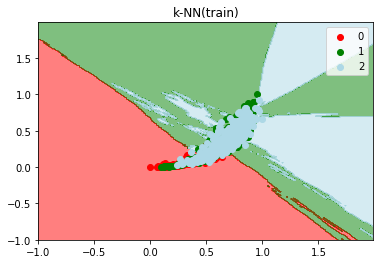

In [25]:
x_set,y_set = xtrain,ytrain

x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
                   
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                     alpha=0.5,cmap=ListedColormap(('red','green','lightblue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
                c = ListedColormap(('red','green','lightblue'))(i),label=j)
             
plt.title('k-NN(train)')
plt.legend()

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.532695374800638
